#   <center> <span style="color:#f6f794"> 🧼 Cleaning data</span> </center>
___

### 📚 <span style="color:#f6f794"> Importing libraries and setting displays </span>

In [1]:
import pandas as pd
import numpy as np
import requests
import gzip
from io import BytesIO
import os
from pandas.tseries.offsets import DateOffset
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import time
from geopy.extra.rate_limiter import RateLimiter
import csv
import re

In [2]:
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_columns', None) 

# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', None)     # Show all rows
# pd.set_option('display.max_colwidth', None) # Show entire content of each column
pd.set_option('display.width', None)        # No limit on display width
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping

### 📂 <span style="color:#f6f794"> Opening files and create dataframes of them </span>

In [3]:
# Setting paths
current_dir = os.getcwd()                            # \Airbnb-Analysis\eda
print(current_dir)
parent_dir = os.path.dirname(current_dir)            # \Airbnb-Analysis
print(parent_dir)
data_dir = os.path.join(parent_dir, "data")          # \Airbnb-Analysis\data
print(data_dir)
cleaning_file_path = os.path.join(data_dir, "")      # \Airbnb-Analysis\data\
print(cleaning_file_path)



c:\Users\yaelp\Desktop\Yael\Bootcamp_FactoriaF5_IA_Promo4\Proyectos\Grupales\Airbnb-Analysis\eda
c:\Users\yaelp\Desktop\Yael\Bootcamp_FactoriaF5_IA_Promo4\Proyectos\Grupales\Airbnb-Analysis
c:\Users\yaelp\Desktop\Yael\Bootcamp_FactoriaF5_IA_Promo4\Proyectos\Grupales\Airbnb-Analysis\data
c:\Users\yaelp\Desktop\Yael\Bootcamp_FactoriaF5_IA_Promo4\Proyectos\Grupales\Airbnb-Analysis\data\


In [4]:
GITHUB_RAW_URL = "https://raw.githubusercontent.com/Yael-Parra/Airbnb-Analysis/feature/data-processing-pipeline/processed_data/airbnb_complete.csv.gz"

def load_airbnb_data_from_github(url):
    """
    Downloading and processing Airbnb data from GitHub repository.
    """
    print("🔗 Downloading data from GitHub...")

    try:
        # Download the compressed CSV file from GitHub
        response = requests.get(url)
        response.raise_for_status()

        print("📊 Processing compressed file..")

        # Decompressing and reading the CSV file
        with gzip.open(BytesIO(response.content), 'rt', encoding='utf-8') as f:
            df = pd.read_csv(f)

        print(f"✅ Data downloaded succesfully!")
        print(f"   📋 Rows: {len(df):,}")
        print(f"   📋 Columns: {len(df.columns)}")
        print(f"   📋 Cities: {df['city'].nunique() if 'city' in df.columns else 'N/A'}")

        return df

    except Exception as e:
        print(f"❌ Error while downloading data: {e}")
        return None

# Creating dataframe from GitHub URL
df_raw_1 = load_airbnb_data_from_github(GITHUB_RAW_URL)


🔗 Downloading data from GitHub...
📊 Processing compressed file..
✅ Data downloaded succesfully!
   📋 Rows: 220,031
   📋 Columns: 17
   📋 Cities: 6


C:\Users\yaelp\AppData\Local\Temp\ipykernel_4752\2533526765.py:18: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f)


____
##    <center> 🧹🧹🧹🧹🧹🧹🧹 <span style="color:#f6f794"> START CLEANING </span>  🧹🧹🧹🧹🧹🧹🧹 </center> 

___
####  <span style="color:#f6f794"> <strong> 1️⃣ Columns </strong> </span>

#####  <span style="color:#f05593"> Checking columns names </span>

In [5]:
df_raw_1.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'city'],
      dtype='object')

In [6]:
df_raw_1

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6.0,365.0,Ny
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2.0,355.0,Ny
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1.0,365.0,Ny
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1.0,194.0,Ny
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1.0,0.0,Ny
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220026,49185822,Habitación con TV con Netflix en Lavapiés,172011610,Belaid,Centro,Embajadores,40.40756,-3.69937,Private room,23,30,0,NaN,NaN,8.0,349.0,Madrid
220027,49186179,Habitación con TV con Netflix en Gaztambide,172011610,Belaid,Chamberí,Gaztambide,40.43706,-3.71364,Private room,21,30,0,NaN,NaN,8.0,350.0,Madrid
220028,49187258,Habitación con TV con Netflix en Chamberí,172011610,Belaid,Chamberí,Arapiles,40.43857,-3.70715,Private room,22,7,0,NaN,NaN,8.0,364.0,Madrid
220029,49187471,Habitación con TV con Netflix en Goya,172011610,Belaid,Salamanca,Guindalera,40.43027,-3.66759,Private room,19,30,0,NaN,NaN,8.0,349.0,Madrid


#####  <span style="color:#f05593"> Columns Types </span>
- Changes:
    - ["last_review"]
        - originally it was like object but since it is a date, it was turn into a datetime type

In [7]:
df_raw_1.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count    float64
availability_365                  float64
city                               object
dtype: object

#####  <span style="color:#f05593"> Changing types </span>

In [8]:
df_raw_1["last_review"] = pd.to_datetime(df_raw_1["last_review"], errors="coerce")


#####  <span style="color:#f05593"> Changing Column names data </span>

For clarity purposes:

- id   --> id_announcement
- name --> title_announcement

In [9]:
# Changing name of columns, id for id_announcement and name for title_announcement
df_raw_1 = df_raw_1.rename(columns={
    "id": "id_announcement",
    "name": "title_announcement"
})


In [10]:
df_raw_1.columns

Index(['id_announcement', 'title_announcement', 'host_id', 'host_name',
       'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',
       'room_type', 'price', 'minimum_nights', 'number_of_reviews',
       'last_review', 'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'city'],
      dtype='object')

______

####  <span style="color:#f6f794"> <strong> 2️⃣ Data Rows </strong> </span>

#####  <span style="color:#f05593"> Changing Column:</span> <span style="color:#fe5608">  ["city"]  </span> <span style="color:#f05593"> data </span>



In [11]:
df_raw_1["city"].unique()

array(['Ny', 'London', 'Milan', 'Tokyo', 'Sydney', 'Madrid'], dtype=object)

In [12]:
df_raw_1["city"] = df_raw_1["city"].replace("Ny", "New York")

In [13]:
df_raw_1

,id_announcement,title_announcement,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6.0,365.0,New York
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2.0,355.0,New York
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaT,NaN,1.0,365.0,New York
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1.0,194.0,New York
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1.0,0.0,New York
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220026,49185822,Habitación con TV con Netflix en Lavapiés,172011610,Belaid,Centro,Embajadores,40.40756,-3.69937,Private room,23,30,0,NaT,NaN,8.0,349.0,Madrid
220027,49186179,Habitación con TV con Netflix en Gaztambide,172011610,Belaid,Chamberí,Gaztambide,40.43706,-3.71364,Private room,21,30,0,NaT,NaN,8.0,350.0,Madrid
220028,49187258,Habitación con TV con Netflix en Chamberí,172011610,Belaid,Chamberí,Arapiles,40.43857,-3.70715,Private room,22,7,0,NaT,NaN,8.0,364.0,Madrid
220029,49187471,Habitación con TV con Netflix en Goya,172011610,Belaid,Salamanca,Guindalera,40.43027,-3.66759,Private room,19,30,0,NaT,NaN,8.0,349.0,Madrid


___
#### <span style="color:#f6f794"> <strong> 3️⃣ Seeking for duplicates  </strong> </span>

- Apparently there are no duplicates rows.

In [14]:
df_raw_1['id_announcement'].duplicated().sum()
df_raw_1.duplicated().sum()

np.int64(0)

_____
#### <span style="color:#f6f794"> <strong> 4️⃣ Seeking for nulls </strong> </span>

In [15]:
# Checking for missing values in the dataset QTY
df_raw_1.isna().sum().sort_values(ascending=False)

# Checking for missing values in the dataset PERCENTAGE
(df_raw_1.isna().mean().sort_values(ascending=False) * 100).round(2)

neighbourhood_group               68.86
last_review                       30.74
reviews_per_month                 24.71
availability_365                   5.21
calculated_host_listings_count     5.21
host_name                          0.32
title_announcement                 0.03
id_announcement                    0.00
host_id                            0.00
room_type                          0.00
longitude                          0.00
latitude                           0.00
neighbourhood                      0.00
number_of_reviews                  0.00
minimum_nights                     0.00
price                              0.00
city                               0.00
dtype: float64

###  <span style="color:#f05593"> Imputing nulls </span> 

- <span style="color:#fe5608">  neighbourhood_group  </span> THIS COLUMN <u>CANNOT</u> BE TAKEN INTO ACCOUNT
    - Original nulls: 151,518 == 68.86%
    - Imputed by "Unknown" 
        - There are no neighbourhoods_groups for the cities affected
        - The only way to impute is:
            - to use the geopy library
            - study the administrative division in countries affected
            - If there is time and this columns is really needed I'll do it
        - In the meantime, the column will be imputed with "Unknown"

- <span style="color:#fe5608">  last_review </span> THIS COLUMN NEEDS TO BE TAKEN BUT <u>CAREFULLY</u> 
    - Original nulls: 6,631 = 30.74%
        - Imputed with "1900-01-01" when "number_of_reviews" is 0 and "reviews_per_month" is 0.0
            - Since a model will be used and it is not possible to have a Nan, it will be imputed with date "1900-01-01" 
            - 67,631 -  13,383 = 54,248 rows where imputed
    - After 1st imputation: 13,383 nulls left = 6.08%
        - Imputed with a calculation of the estimated missing last_review dates using the number of reviews and reviews per month, assuming a regular review pattern.
    - After 2nd imputation:  2,209 nulls left
        - There's no way to impute this except by a fake date
        - Imputed with "1900-01-01" 
    - After 3rd imputation:      0 nulls left

THIS COLUMN CAN BE TAKEN INTO ACCOUNT BUT NEEDS TO BE TAKEN CAREFULLY. APROX 72% OF DATA IS USEFUL

- <span style="color:#fe5608">  reviews_per_month </span> THIS COLUMN <u>SHOULD NOT</u> BE TAKEN INTO ACCOUNT
    - Original nulls QTY: 54,371 == 24.71 %
        - If there are no "number_of_reviews", there are no "reviews_per_month" therefore, this will be imputed with 0 when there are no reviews to start with
    - Afeter 1st imputation:123 nulls left
        - When there are no "last_reviews", there are no "reviews_per_month", which is logic
        - Imputing with zero "0.0" when "number_of_reviews" is 1 and when "last_review" is null
            - In order not to false any data and since this column means how many reviews they got per month and since they only got 1, this might mean they got the first and only review when the "guests" just left
    - After 2nd imputation: 6 nulls left
        - Imputed by median

- <span style="color:#fe5608">  availability_365 </span>
    - Original nulls QTY: 11,466 == 5.21%
    - Distribuition with outliers
    - Tokyo is the only city with no values
        - Imputed with the global mean of other cities.

    TOKYO NEEDS TO BE LOOKED CAREFULLY 
- <span style="color:#fe5608">  calculated_host_listings_count </span> NOT TO TAKE INTO ACCOUNT TOKYO in this COLUMN
    - Original nulls QTY: 11,466 == 5.21%
    - Tokyo is the city with null values
    - Imputed with zero "0"
    - This column has nothing to do with the appartment and everything to do with the host, since in this dataset there's nothing regarding the host, it has no sense to impute.

- <span style="color:#fe5608">  host_name </span>
    - Original nulls qty: 706 == 0.32%
    - host_id : 175128252 has at least 2 different host_names
        - It seems the name was changed for company reasons
        - It will be changed to "Team Gospodin"
    - After 1st imputation: qty of nulls: 586
    - After 2nd impitation: qty of nulls 0
- <span style="color:#fe5608">  title_announcement </span>
    - Original nulls qty: 67 == 0.03%
    - Too little to keep BUT, let's keep it for the moment
        - Since it is necessary for the rows to be filled for the possible future model, let's impute them with "Unknown title "

####  <span style="color:#fe5608"> ["neighbourhood_group"] </span>

- Original nulls: 151,518 
    - Imputed by "Unknown" 
        - There are no neighbourhoods_groups for the cities affected
        - The only way to impute is:
            - to use the geopy library
            - study the administrative division in countries affected
            - If there is time and this columns is really needed I'll do it
        - In the meantime, the column will be imputed with "Unknown"

In [16]:
# Checking what neighbourhood appears when neighbourhood_group is null
df_raw_1[df_raw_1['neighbourhood_group'].isnull()][["neighbourhood_group",'neighbourhood', 'city']]

# Check if that neighbourhood appears in any other neighbourhood_group
nbh_group_map = df_raw_1[['neighbourhood', 'neighbourhood_group']].drop_duplicates()
nbh_group_conflicts = nbh_group_map.groupby('neighbourhood')['neighbourhood_group'].nunique() # None

# Check which Cities are when the neighbourhood_group is null
df_raw_1[df_raw_1['neighbourhood_group'].isnull()]['city'].unique() # ['London', 'Milan', 'Tokyo', 'Sydney']

# Check how many neighbourhoods are in each City when neighbourhood_group is null
df_raw_1[df_raw_1['neighbourhood_group'].isnull()].groupby('city')['neighbourhood'].nunique() # London: 33, Milan: 87, Tokyo: 38, Sydney: 56
 
# Checking now how many neighbourhoods are in each City when neighbourhood_group is NOT null
df_raw_1[df_raw_1['neighbourhood_group'].notnull()].groupby('city')['neighbourhood'].nunique() # Madrid: 128, New York: 221

# Checking the lenght of neighbourhood by City when neighbourhood_group is null and when it is not null
df_raw_1[df_raw_1['neighbourhood_group'].isnull()].groupby('city')['neighbourhood'].apply(lambda x: len(x.unique())) # London: 33, Milan: 87, Tokyo: 38, Sydney: 56
df_raw_1[df_raw_1['neighbourhood'].isnull()].groupby('city')['neighbourhood_group'].apply(lambda x: len(x.unique())) # 0

# Checking which neighbourhoods are in each City when neighbourhood_group is null
df_raw_1[df_raw_1['neighbourhood_group'].isnull()].groupby('city')['neighbourhood'].unique() # London: 33, Milan: 87, Tokyo: 38, Sydney: 56

# Check unique neighbourhood_group values when city is not Madrid or New York
df_raw_1[df_raw_1['city'].isin(['London', 'Milan', 'Tokyo', 'Sydney'])]['neighbourhood_group'].unique() # [nan]

array([nan], dtype=object)

In [17]:
# Check the nunique neighbourhood grouped by city when neighbourhood_group is null, so we can determine from which neighbourhood_group the neighbourhoods are
df_raw_1[df_raw_1['neighbourhood_group'].isnull()] \
    .groupby('city')['neighbourhood'] \
    .unique() \
    .apply(list)

city
London    [Lambeth, Islington, Kensington and Chelsea, W...
Milan     [TIBALDI, NAVIGLI, SARPI, VIALE MONZA, BUENOS ...
Sydney    [Sydney, Manly, Leichhardt, Woollahra, North S...
Tokyo     [Shibuya Ku, Sumida Ku, Nerima Ku, Setagaya Ku...
Name: neighbourhood, dtype: object

In [18]:
# Checkin the neighbourhoods grouped by city when city is not Madrid or New York
df_raw_1[df_raw_1['city'].isin(['London', 'Milan', 'Tokyo', 'Sydney'])] \
    .groupby('city')['neighbourhood'] \
    .unique() \
    .apply(list)

# Printing the neighbourhoods grouped by city when neighbourhood_group is null
for city, neighbourhoods in df_raw_1[df_raw_1['neighbourhood_group'].isnull()] \
        .groupby('city')['neighbourhood'] \
        .unique() \
        .items():
    print(f"{city}: {', '.join(neighbourhoods)}")

London: Lambeth, Islington, Kensington and Chelsea, Westminster, Wandsworth, Croydon, Tower Hamlets, Hammersmith and Fulham, Barnet, Merton, Hounslow, Camden, Haringey, Richmond upon Thames, Southwark, Hackney, Brent, Ealing, Waltham Forest, Newham, Lewisham, Enfield, City of London, Greenwich, Bromley, Hillingdon, Havering, Barking and Dagenham, Harrow, Redbridge, Kingston upon Thames, Bexley, Sutton
Milan: TIBALDI, NAVIGLI, SARPI, VIALE MONZA, BUENOS AIRES - VENEZIA, MAGENTA - S. VITTORE, CENTRALE, XXII MARZO, BRERA, DUOMO, TICINESE, ISOLA, BANDE NERE, WASHINGTON, UMBRIA - MOLISE, PARCO FORLANINI - ORTICA, LAMBRATE, VILLAPIZZONE, GUASTALLA, CITTA' STUDI, STADERA, S. SIRO, S. CRISTOFORO, GIAMBELLINO, PADOVA, LORETO, DE ANGELI - MONTE ROSA, BOVISASCA, PORTA ROMANA, TORTONA, GRATOSOGLIO - TICINELLO, VIGENTINA, BICOCCA, GARIBALDI REPUBBLICA, GHISOLFA, RIPAMONTI, PORTELLO, SACCO, PARCO LAMBRO - CIMIANO, RONCHETTO SUL NAVIGLIO, BOVISA, LODI - CORVETTO, FORZE ARMATE, BAGGIO, BARONA, PAGANO,

In [19]:
# from geopy.geocoders import Nominatim
# from geopy.extra.rate_limiter import RateLimiter
# import pandas as pd
# import time

# # ---------- CONFIGURACIÓN GENERAL ---------- #
# geolocator = Nominatim(user_agent="geoapiExercises")
# reverse = RateLimiter(geolocator.reverse, min_delay_seconds=1)

# # Función para obtener la área administrativa
# def get_admin_area(row):
#     try:
#         location = reverse((row['latitude'], row['longitude']), exactly_one=True)
#         if location and 'address' in location.raw:
#             address = location.raw['address']
#             return address.get('suburb') or address.get('neighbourhood') or address.get('city_district') or address.get('district')
#     except Exception as e:
#         print(f"Error: {e}")
#     return None

# # ---------- PROCESAMIENTO POR CIUDADES Y CHUNKS ---------- #
# # Lista de ciudades a procesar
# cities_to_process = ['London', 'Milan', 'Tokyo', 'Sydney']

# # Tamaño del chunk
# chunk_size = 50

# # Recorremos cada ciudad
# for city in cities_to_process:
#     df_city = df_missing_group[df_missing_group['city'] == city].copy()
#     total_rows = len(df_city)
#     print(f"\n📍 Procesando ciudad: {city} ({total_rows} filas)\n")

#     # Dividir en chunks
#     for start in range(0, total_rows, chunk_size):
#         end = min(start + chunk_size, total_rows)
#         chunk = df_city.iloc[start:end].copy()

#         # Aplicar función
#         print(f"⏳ Procesando filas {start} a {end}...")
#         chunk['admin_area_guess'] = chunk.apply(get_admin_area, axis=1)

#         # Guardar chunk procesado
#         filename = f"reverse_{city.lower()}_chunk_{start}_{end}.csv"
#         chunk.to_csv(filename, index=False)
#         print(f"✅ Guardado: {filename}")

#         # Esperar para no sobrecargar el servicio
#         time.sleep(1)


In [20]:
# Imputing with "Uknown" for neighbourhood_group when it is null
df_raw_1.loc[:, 'neighbourhood_group'] = df_raw_1['neighbourhood_group'].astype(str).str.strip()

# Replacing empty strings and 'nan' strings with NaN
df_raw_1.loc[df_raw_1['neighbourhood_group'] == '', 'neighbourhood_group'] = np.nan
df_raw_1.loc[df_raw_1['neighbourhood_group'].str.lower() == 'nan', 'neighbourhood_group'] = np.nan

# Fill all NaNs with "Unknown"
df_raw_1.loc[:, 'neighbourhood_group'] = df_raw_1['neighbourhood_group'].fillna("Unknown")


In [21]:
df_raw_1["neighbourhood_group"].isnull().sum()  # 0
df_raw_1["neighbourhood_group"].unique() 
df_raw_1["neighbourhood_group"].nunique() # 27
df_raw_1["neighbourhood_group"].value_counts()

neighbourhood_group
Unknown                  151518
Manhattan                 21661
Brooklyn                  20104
Centro                     8649
Queens                     5666
Salamanca                  1324
Chamberí                   1252
Arganzuela                 1104
Bronx                      1091
Tetuán                      816
Carabanchel                 708
Retiro                      664
Ciudad Lineal               649
Puente de Vallecas          617
Latina                      608
Chamartín                   580
Moncloa - Aravaca           554
San Blas - Canillejas       497
Staten Island               373
Hortaleza                   364
Fuencarral - El Pardo       315
Usera                       280
Villaverde                  177
Barajas                     172
Moratalaz                   118
Villa de Vallecas            98
Vicálvaro                    72
Name: count, dtype: int64

#### <span style="color:#fe5608"> ["reviews_per_month"] </span>

- Original nulls QTY: 54,371
    - If there are no "number_of_reviews", there are no "reviews_per_month" therefore, this will be imputed with 0 when there are no reviews to start with
- Afeter 1st imputation:123 nulls left
    - When there are no "last_reviews", there are no "reviews_per_month", which is logic
    - Imputing with zero "0.0" when "number_of_reviews" is 1 and when "last_review" is null
        - In order not to false any data and since this column means how many reviews they got per month and since they only got 1, this might mean they got the first and only review when the "guests" just left
- After 2nd imputation: 6 nulls left
    - Imputed by median

In [22]:
df_raw_1.loc[df_raw_1['number_of_reviews'] == 0, 'reviews_per_month'] = 0

In [23]:
df_raw_1["reviews_per_month"].isnull().sum() # 123

np.int64(123)

In [24]:
# Ver los registros con reviews_per_month nulo
null_reviews = df_raw_1[df_raw_1['reviews_per_month'].isnull()]
null_reviews[['id_announcement', 'title_announcement', 'number_of_reviews', 'last_review', 'availability_365', 'reviews_per_month']].sample(10)


,id_announcement,title_announcement,number_of_reviews,last_review,availability_365,reviews_per_month
199428,30377417,2 bedroom apartment for NYE with harbour view!,1,NaT,81.0,NaN
198671,30209790,Whole Apartment - Close to Bondi & Harbour views,1,NaT,141.0,NaN
193901,27812722,Beach Garden Paradise with Ocean Views,1,NaT,30.0,NaN
190026,24252084,Manly beach house,1,NaT,5.0,NaN
196185,29325389,2 bedroom 200m from DY Beach - All facilities avb,1,NaT,21.0,NaN
178952,17257264,"PERFECT 2 BED APT - GREAT LOCATION, CLOSE TO UNSW",1,NaT,0.0,NaN
199123,30303165,"Spacious 1 bed apt, close to Coogee beach.",1,NaT,10.0,NaN
195994,29239872,Celebrate Xmas @ 5 min walk to Manly Surf Beach,1,NaT,7.0,NaN
199780,30453876,- Beach side stay,1,NaT,14.0,NaN
198936,30272758,Cute 1 bedroom Apartment,1,NaT,8.0,NaN


In [25]:
null_reviews['number_of_reviews'].value_counts() # 1: 117, 2:4, 4:1, 3:1
null_reviews['last_review'].isnull().value_counts() # 123 It seems number_of_reviews comes from last_review

last_review
True    123
Name: count, dtype: int64

In [26]:
# Imputing reviews_per_month with 0.0 when number_of_reviews is 1 and last_review is null
df_raw_1.loc[(df_raw_1['number_of_reviews'] == 1) & (df_raw_1['last_review'].isnull()),'reviews_per_month'] = 0

In [27]:
df_raw_1['reviews_per_month'].isnull().sum() # 6 

np.int64(6)

In [28]:
# Imputing the remaining null values in reviews_per_month with the median
median_rpm = df_raw_1['reviews_per_month'].median()
df_raw_1.fillna({'reviews_per_month':median_rpm}, inplace=True)

In [29]:
df_raw_1['reviews_per_month'].isnull().sum() # 0

np.int64(0)

#### <span style="color:#fe5608">  ["last_review"] </span>
- Original nulls: 6,631 = 30.74%
    - Imputed with "1900-01-01" when "number_of_reviews" is 0 and "reviews_per_month" is 0.0
        - Since a model will be used and it is not possible to have a Nan, it will be imputed with date "1900-01-01" 
        - 67,631 -  13,383 = 54,248 rows where imputed
- After 1st imputation: 13,383 nulls left = 6.08%
    - Imputed with a calculation of the estimated missing last_review dates using the number of reviews and reviews per month, assuming a regular review pattern.
- After 2nd imputation:  2,209 nulls left
    - There's no way to impute this except by a fake date
    - Imputed with "1900-01-01" 
- After 3rd imputation:      0 nulls left

THIS COLUMN CAN BE TAKEN INTO ACCOUNT BUT NEEDS TO BE TAKEN CAREFULLY. APROX 72% OF DATA IS USEFUL


In [30]:
# Checking qty and percentage of null values in 'last_review' column
df_raw_1['last_review'].isnull().sum()  # 67,631
(df_raw_1['last_review'].isnull().mean() * 100).__round__(2)  # 30.74%

np.float64(30.74)

In [31]:
df_raw_1['last_review'].dtypes # M8[ns]
df_raw_1['last_review'].sample(10)

# Check the number_of_reviews and reviews_per_month when last_review is null
df_raw_1[df_raw_1['last_review'].isnull()][['id_announcement', 'title_announcement', 'number_of_reviews', 'reviews_per_month', 'last_review']].sample(10)

,id_announcement,title_announcement,number_of_reviews,reviews_per_month,last_review
81472,19907636,Welcoming hosts,0,0.00,NaT
135989,5240393,Un gioiellino sui Navigli,2,0.03,NaT
146163,33674959,Porta Venezia! Nice and colorful flat,40,1.49,NaT
140596,19094515,Jasmine apartment,6,0.12,NaT
149815,44607576,La grande terrazza a due passi da corso Sempione,1,0.00,NaT
147387,38257118,Blue Home - Milan short term rental,6,0.30,NaT
200620,655514,Room for one or two people,0,0.00,NaT
138269,11450451,Cozy Apartment close to University,1,0.00,NaT
134264,715392,Glamour next to Leonardo's Cenacolo,97,1.22,NaT
199942,30490417,Modern Apartment with pool,0,0.00,NaT


In [32]:
# Imputing with "1900-01-01" for last_review when "number_of_reviews" is 0 and "reviews_per_month" is 0.0
df_raw_1.loc[(df_raw_1['number_of_reviews'] == 0) & (df_raw_1['reviews_per_month'] == 0.0), 'last_review'] = pd.to_datetime("1900-01-01")

In [33]:
df_raw_1['last_review'].isnull().sum() # 13,383
(df_raw_1['last_review'].isnull().mean() * 100).__round__(2) # 6.08%
df_raw_1[df_raw_1['last_review'].isnull()][['id_announcement', 'title_announcement', 'number_of_reviews', 'reviews_per_month', 'last_review']].sample(10)

,id_announcement,title_announcement,number_of_reviews,reviews_per_month,last_review
140397,18084440,Nice and pretty mansard in Milan,23,0.47,NaT
147058,36866158,AMAZING DESIGN 200mq LOFT,2,0.09,NaT
141609,22694453,Hemeras Boutique Homes: open space Cathedral #1,3,3.00,NaT
141782,23055337,39rentals - Candida,13,0.32,NaT
143809,28881556,Appartamento A Milano in zona Lodovico il Moro,3,0.10,NaT
135235,3165599,Martesana Park View,24,0.29,NaT
139220,14997534,Design in vecchia milano,17,0.31,NaT
147378,38208277,Bicocca/Niguarda house,6,0.27,NaT
142957,24960654,SWEET MAMA GIUSY,21,0.55,NaT
137838,9184842,"Cozy ""old Milan"" duplex",7,0.11,NaT


In [34]:
# Ensure the 'last_review' column is in datetime format
df_raw_1['last_review'] = pd.to_datetime(df_raw_1['last_review'], errors='coerce')

# Display basic statistics of 'last_review' dates
df_raw_1['last_review'].describe() # latest date  2021-04-17 00:00:00

count                           206648
mean     1987-10-09 12:57:59.865278272
min                1900-01-01 00:00:00
25%                1900-01-01 00:00:00
50%                2018-11-21 00:00:00
75%                2019-07-08 00:00:00
max                2021-04-17 00:00:00
Name: last_review, dtype: object

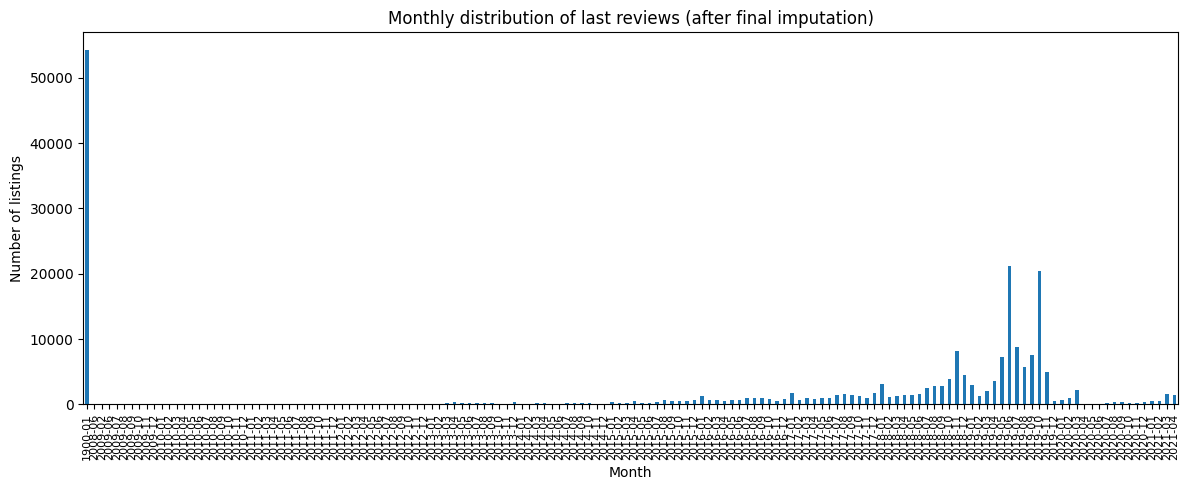

In [35]:
# After several revisions and attempts on how to impute las1t_review, we will use the following approach:


# Step 1: Identify rows you manually marked as never reviewed
mask_artificial_1900 = (
    (df_raw_1['number_of_reviews'] == 0) &
    (df_raw_1['reviews_per_month'] == 0.0)
)

# Step 2: Create a mask for rows eligible for imputation
mask_impute = (
    df_raw_1['last_review'].isnull() &
    (df_raw_1['number_of_reviews'] > 0) &
    (df_raw_1['reviews_per_month'] > 0)
)

# Step 3: Estimate duration of review activity in days
estimated_months = df_raw_1.loc[mask_impute, 'number_of_reviews'] / df_raw_1.loc[mask_impute, 'reviews_per_month']
estimated_days = estimated_months * 30  # Approximate month length

# Step 4: Calculate median from valid dates (excluding '1900-01-01')
median_valid_date = df_raw_1.loc[~mask_artificial_1900, 'last_review'].dropna().median()

# Step 5: Perform imputation for eligible rows
df_raw_1.loc[mask_impute, 'last_review'] = median_valid_date - pd.to_timedelta(estimated_days, unit='D')

# Step 6: Restore the artificial '1900-01-01' date for manually flagged rows
df_raw_1.loc[mask_artificial_1900, 'last_review'] = pd.to_datetime('1900-01-01')

# Step 7: Optional — plot the final distribution of 'last_review' dates
plt.figure(figsize=(12, 5))
df_raw_1['last_review'].dropna().dt.to_period('M').value_counts().sort_index().plot(
    kind='bar',
    title='Monthly distribution of last reviews (after final imputation)'
)
plt.xlabel('Month')
plt.ylabel('Number of listings')
plt.xticks(rotation=90, fontsize=8)
plt.tight_layout()
plt.show()

In [36]:
df_raw_1['last_review'].isnull().sum() # 2,209
(df_raw_1['last_review'].isnull().mean() * 100).__round__(2) # 1.0%
# Checking the number_of_reviews and reviews_per_month when last_review is null
df_raw_1[df_raw_1['last_review'].isnull()][['id_announcement', 'title_announcement', 'number_of_reviews', 'reviews_per_month', 'last_review']].sample(10)
# Checking the unique values of number_of_reviews and reviews_per_month when last_review is null
df_raw_1[df_raw_1['last_review'].isnull()]['number_of_reviews'].unique() # 1
df_raw_1[df_raw_1['last_review'].isnull()]['reviews_per_month'].unique() # 0

array([0.])

In [37]:
# The nulls left have only 1 review and it's whole history therefore it cannot have a review_per_month value and even less a last_review date. This is why, the remaining nulls will be imputed with "1900-01-01".
df_raw_1.loc[df_raw_1['last_review'].isnull(), 'last_review'] = pd.to_datetime("1900-01-01")

In [38]:
df_raw_1['last_review'].isnull().sum() # 0

np.int64(0)

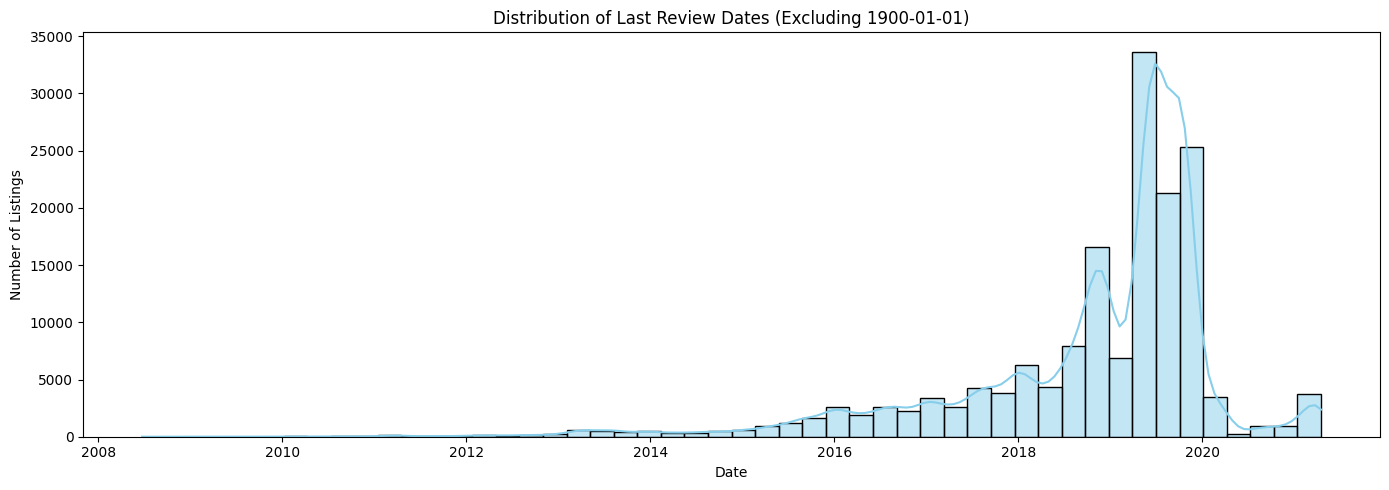

In [39]:
# Checking if this column gives actual good information or if it is unnecessary

# Exclude artificial date
valid_dates = df_raw_1[df_raw_1['last_review'] != pd.to_datetime('1900-01-01')]['last_review']

plt.figure(figsize=(14, 5))
sns.histplot(valid_dates, bins=50, kde=True, color='skyblue')
plt.title('Distribution of Last Review Dates (Excluding 1900-01-01)')
plt.xlabel('Date')
plt.ylabel('Number of Listings')
plt.tight_layout()
plt.show()

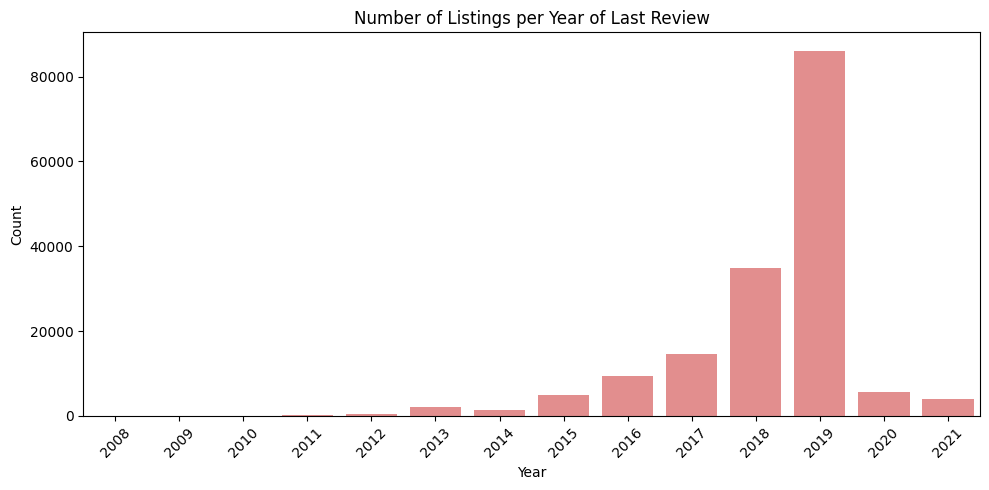

In [40]:
# Extract year for aggregation
df_valid = df_raw_1[df_raw_1['last_review'] != pd.to_datetime('1900-01-01')].copy()
df_valid['review_year'] = df_valid['last_review'].dt.year

plt.figure(figsize=(10, 5))
sns.countplot(data=df_valid, x='review_year', color='lightcoral')
plt.title('Number of Listings per Year of Last Review')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


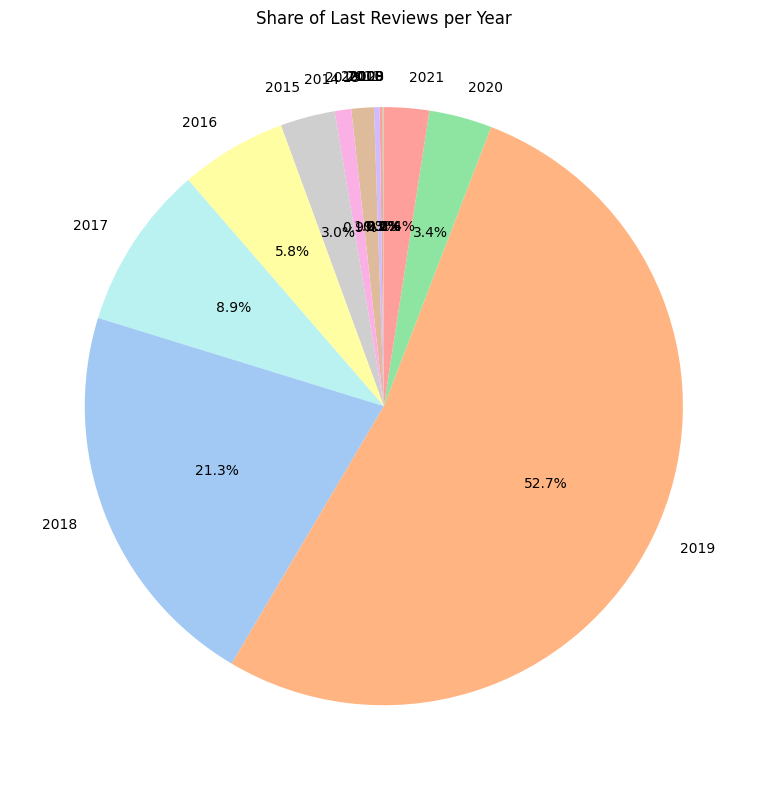

In [41]:
# Count number of listings by year
year_counts = df_valid['review_year'].value_counts().sort_index()

plt.figure(figsize=(8, 8))
plt.pie(year_counts, labels=year_counts.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Share of Last Reviews per Year')
plt.tight_layout()
plt.show()


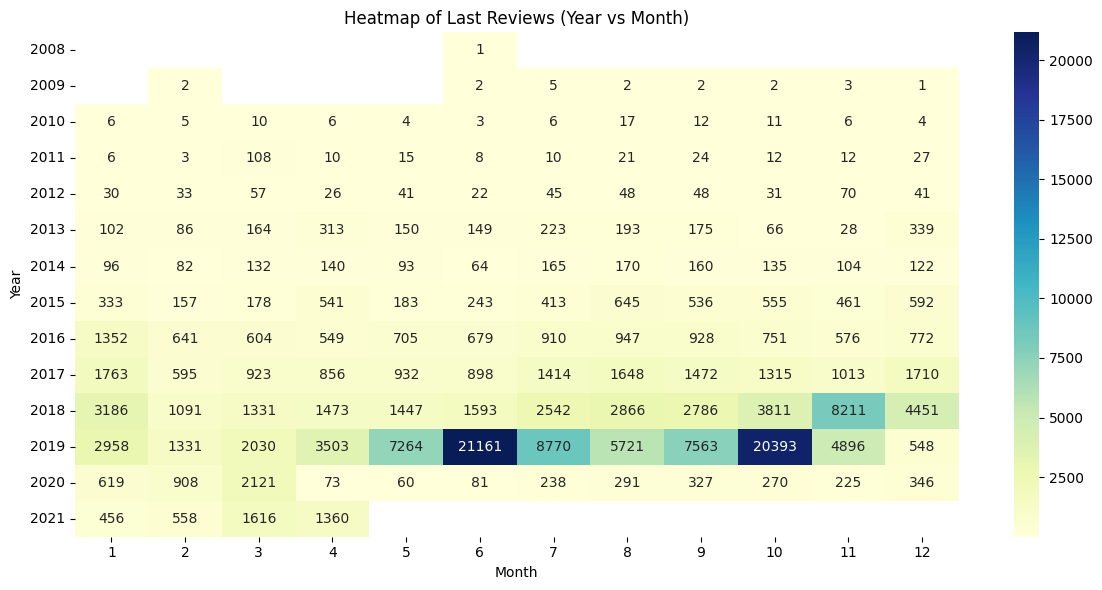

In [42]:
# Extract year and month
df_valid['review_month'] = df_valid['last_review'].dt.month

# Create pivot table
heatmap_data = df_valid.pivot_table(index='review_year', columns='review_month', values='id_announcement', aggfunc='count')

plt.figure(figsize=(12, 6))
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Heatmap of Last Reviews (Year vs Month)')
plt.xlabel('Month')
plt.ylabel('Year')
plt.tight_layout()
plt.show()


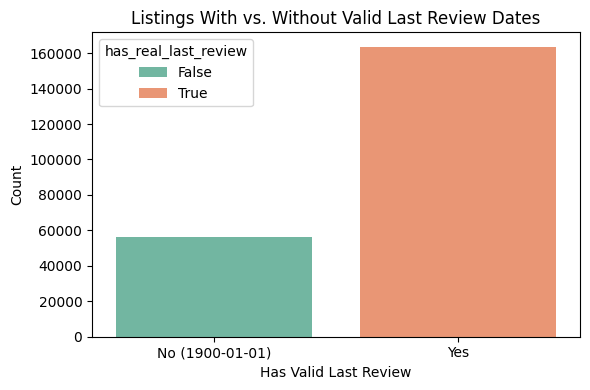

In [43]:
# Comparing presence vs absence of real review dates (incl. 1900-01-01) THIS WILL BE USED TO DECIDE IF WE KEEP THE COLUMN OR NOT (noise vs information)
df_raw_1['has_real_last_review'] = df_raw_1['last_review'] != pd.to_datetime('1900-01-01')

plt.figure(figsize=(6, 4))
sns.countplot(x='has_real_last_review', data=df_raw_1, palette='Set2', hue='has_real_last_review', order=[False, True])
plt.title('Listings With vs. Without Valid Last Review Dates')
plt.xlabel('Has Valid Last Review')
plt.ylabel('Count')
plt.xticks([0, 1], ['No (1900-01-01)', 'Yes'])
plt.tight_layout()
plt.show()

# Approximately 72% is useful data, while 28% is noise (1900-01-01).
# Deciding to keep the column as it provides useful information about the last review date.

In [44]:
# Eliminating the column "last_review" since it has no useful information after the imputations
# df_raw_1.drop(columns=['last_review'], inplace=True)

####  <span style="color:#fe5608"> ["availability_365"] </span>

- Original nulls QTY: 11,466 -- 5.21%
- Distribuition with outliers
- Tokyo is the only city with no values
    - Imputed with the global mean of other cities.

TOKYO NEEDS TO BE LOOKED CAREFULLY    

In [45]:
# Percentage of null values in columns "availability_365" round to 2 decimal places
null_availability = df_raw_1['availability_365'].isnull().mean() * 100
null_availability.round(2)  # 5.21%

np.float64(5.21)

count    208565.000000
mean        120.330918
std         134.644491
min           0.000000
25%           0.000000
50%          64.000000
75%         244.000000
max         365.000000
Name: availability_365, dtype: float64


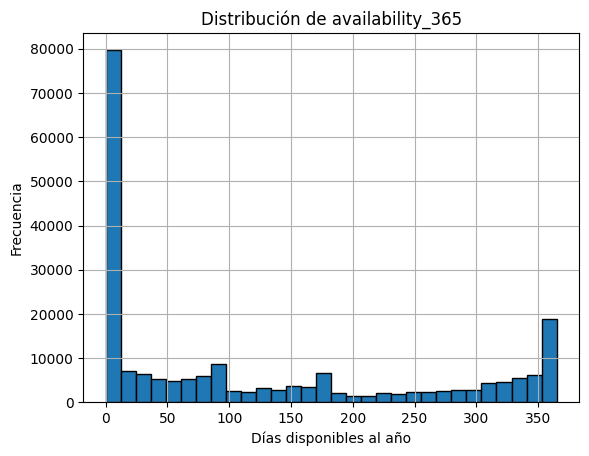

In [46]:
print(df_raw_1['availability_365'].describe())


df_raw_1['availability_365'].hist(bins=30, edgecolor='black')
plt.title('Distribución de availability_365')
plt.xlabel('Días disponibles al año')
plt.ylabel('Frecuencia')
plt.show()

In [47]:
# Check unique values in "room_type" column
df_raw_1['room_type'].nunique() # 4
df_raw_1['room_type'].unique()  # ['Private room', 'Entire home/apt', 'Shared room', 'Hotel room']

# Check nulls in availability_365 grouped by City
df_raw_1[df_raw_1['availability_365'].isnull()].groupby('city')['availability_365'].count() # Only Tokyo has nulls

# Check nulls in availability_365 grouped by room_type
df_raw_1[df_raw_1['availability_365'].isnull()].groupby('room_type')['availability_365'].count() # It has only 3 types of room and they are all null. Entire home/apt, Private room & Shared room

room_type
Entire home/apt    0
Private room       0
Shared room        0
Name: availability_365, dtype: int64

        city        room_type  availability_365
0     London  Entire home/apt              48.0
1     London       Hotel room             308.0
2     London     Private room              64.0
3     London      Shared room              90.0
4     Madrid  Entire home/apt             147.0
5     Madrid       Hotel room             269.0
6     Madrid     Private room              90.0
7     Madrid      Shared room             104.0
8      Milan  Entire home/apt             128.0
9      Milan       Hotel room             174.0
10     Milan     Private room              90.0
11     Milan      Shared room              89.0
12  New York  Entire home/apt              42.0
13  New York     Private room              45.0
14  New York      Shared room              90.0
15    Sydney  Entire home/apt              41.0
16    Sydney     Private room              27.0
17    Sydney      Shared room              34.0
18     Tokyo  Entire home/apt               NaN
19     Tokyo     Private room           

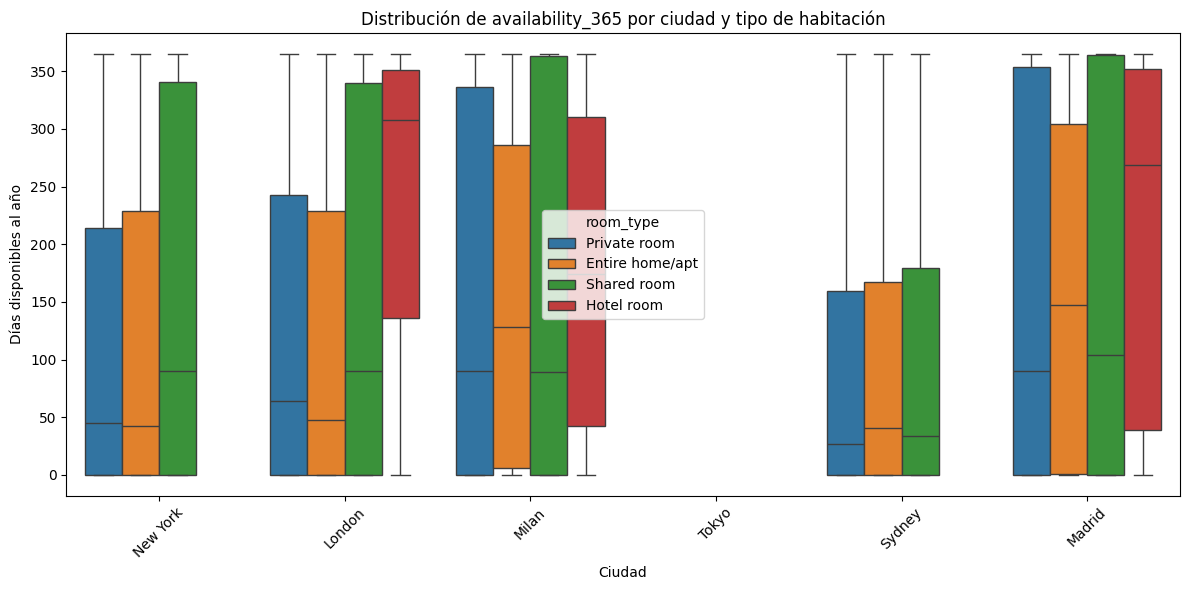

In [48]:
# Calcular la mediana de availability_365 por city y room_type
availability_medians = df_raw_1.groupby(['city', 'room_type'])['availability_365'].median().reset_index()

# Ordenamos para visualización más clara
availability_medians = availability_medians.sort_values(by=['city', 'room_type'])

# Mostramos el resultado
print(availability_medians)


plt.figure(figsize=(12,6))
sns.boxplot(data=df_raw_1, x='city', y='availability_365', hue='room_type')
plt.title('Distribución de availability_365 por ciudad y tipo de habitación')
plt.ylabel('Días disponibles al año')
plt.xlabel('Ciudad')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [49]:
# Compute global mean availability by room type
global_availability_means = df_raw_1.groupby('room_type')['availability_365'].mean()

# Function to impute Tokyo rows only
def impute_tokyo_availability(row):
    if pd.notnull(row['availability_365']):
        return row['availability_365']
    
    if row['city'] == 'Tokyo':
        room_type = row['room_type']
        if room_type in global_availability_means:
            return global_availability_means[room_type]
    
    return row['availability_365']  # Return original (including NaN) for other cities

# Calling function
df_raw_1['availability_365'] = df_raw_1.apply(impute_tokyo_availability, axis=1)


In [50]:
df_raw_1['availability_365'].isnull().sum() # 0

np.int64(0)

####  <span style="color:#fe5608"> ["calculated_host_listings_count"] </span>

- Original nulls QTY: 11,466 -- 5.21%
- Tokyo is the city with null values
- Imputed with zero "0"
- This column has nothing to do with the appartment and everything to do with the host, since in this dataset there's nothing regarding the host, it has no sense to impute.
- NOT TO TAKE INTO ACCOUNT TOKYO in this COLUMN

In [51]:
# Check the nulls groped by city
df_raw_1[df_raw_1['calculated_host_listings_count'].isnull()].groupby('city')['calculated_host_listings_count'].count() # Tokyo is completely null

city
Tokyo    0
Name: calculated_host_listings_count, dtype: int64

In [52]:
# Impute with 0 all Tokyo rows
df_raw_1.loc[df_raw_1['city'] == 'Tokyo', 'calculated_host_listings_count'] = 0

####  <span style="color:#fe5608"> ["host_name"] </span>

- Original nulls qty: 706 & 0.32%
- host_id : 175128252 has at least 2 different host_names
    - It seems the name was changed for company reasons
    - It will be changed to "Team Gospodin"
- After 1st imputation: qty of nulls: 586
- After 2nd impitation: qty of nulls 0

In [53]:
# Checking percentage of nulls in column host_name round to 2 decimal places
(df_raw_1['host_name'].isnull().mean() * 100).__round__(2)  # 0.32%

np.float64(0.32)

In [54]:
# Check for missing values in 'host_name'
host_nulls = df_raw_1[df_raw_1['host_name'].isnull()]

# Extracting unique host_ids with null 'host_name'
host_ids_with_nulls = host_nulls['host_id'].unique()

# Look for host rows where the host has a name in some entries but not in others.
recoverable_hosts = df_raw_1[
    (df_raw_1['host_id'].isin(host_ids_with_nulls)) &
    (df_raw_1['host_name'].notnull())
].sort_values('host_id')[['host_id', 'host_name']].drop_duplicates()

recoverable_hosts

,host_id,host_name
103529,175128252,Gospodin
219624,175128252,Team Gospodin


In [55]:
df_raw_1.loc[df_raw_1['host_id'] == 175128252, 'host_name'] = "Team Gospodin"

In [56]:
# Imputing "Unknown host name" for rows where host_name is null
df_raw_1.fillna({"host_name": "Unknown host name"}, inplace=True)

In [57]:
df_raw_1['host_name'].isnull().sum()  # 0

np.int64(0)

In [58]:
# It seems there are nulls in "host_name" column, let's check it
df_raw_1['host_name'].isnull().sum()  # 0
df_raw_1['host_name'].nunique() # 31,496

# Let's check it with numpy and regex
df_raw_1['host_name'].str.contains(r'^\s*$', regex=True).sum()  # 0
# Check if there are any empty strings in 'host_name'
df_raw_1['host_name'].str.strip().eq('').sum()  # 0
# Check if there are any strings that contain only whitespace
df_raw_1['host_name'].str.strip().eq('').sum()  # 0
# Check if there are any strings that contain only whitespace characters
df_raw_1['host_name'].str.isspace().sum()  # 0
# Check if there are weird characters in 'host_name'
df_raw_1['host_name'].str.contains(r'[^\w\s]', regex=True).sum()  # 9,108
# Check if there are any special characters in 'host_name'
df_raw_1['host_name'].str.contains(r'[^a-zA-Z0-9\s]', regex=True).sum()  # 12,958
# Check if there are unusual names in 'host_name'
df_raw_1['host_name'].str.contains(r'^[0-9]+$', regex=True).sum()  # 11
# Check if there are any names that are just numbers
df_raw_1['host_name'].str.contains(r'^[a-zA-Z]+$', regex=True).sum()  # 192,651
# Check the lentgh mean, min and max for 'host_name'
df_raw_1['host_name'].str.len().describe()  # mean: 6.56936977062323, min: 1, max: 35.0

count    220031.000000
mean          6.569370
std           3.731977
min           1.000000
25%           5.000000
50%           6.000000
75%           7.000000
max          35.000000
Name: host_name, dtype: float64

In [59]:
def verify_text_column(df: pd.DataFrame, column_name: str):
    print(f"--- Preparing '{column_name}' column for checks (without modifying the original DataFrame) ---")
    
    # Fill NaNs and ensure string type
    series = df[column_name].fillna('').astype(str)
    print(f"✅ Temporary '{column_name}' series created for checks.\n")

    print(f"--- {column_name} Verification ---")
    print("------------------------------------------\n")

    # CHECK 1: Original NaN values
    print("### 1. Count of Original NaN Values ###")
    null_count = df[column_name].isnull().sum()
    print(f"Total NaN values: {null_count}")
    if null_count > 0:
        print("Sample NaN entries:")
        print(df[df[column_name].isnull()][column_name].head(10).tolist())
    else:
        print("No NaN values found.")

    # CHECK 2: Empty or whitespace-only strings
    print("\n### 2. Empty or Whitespace-Only Strings ###")
    empty_mask = series.str.strip().eq('')
    empty_count = empty_mask.sum()
    print(f"Empty or whitespace-only: {empty_count}")
    if empty_count > 0:
        print("Sample:")
        print(series[empty_mask].head(10).tolist())

    # CHECK 3: Zero-width space
    print("\n### 3. Zero Width Space (\\u200b) ###")
    zws_mask = series.str.contains('\u200b', regex=False)
    zws_series = series[zws_mask]
    print(f"Entries with \\u200b: {len(zws_series)}")
    if not zws_series.empty:
        print("Sample:")
        for name in zws_series.head(10).tolist():
            print(f"  - '{name.replace('\u200b', '[ZWS]')}'")

    # CHECK 4: Purely numeric values
    print("\n### 4. Purely Numeric Values ###")
    numeric_mask = series.str.match(r'^[0-9]+$', na=False)
    numeric_series = series[numeric_mask]
    print(f"Purely numeric entries: {len(numeric_series)}")
    if not numeric_series.empty:
        print("Sample:")
        print(numeric_series.head(10).tolist())

    # CHECK 5: Truly atypical symbols
    print("\n### 5. Truly Atypical Characters ###")
    atypical_regex = r'[^\w\s.,&+\-()!:"\/]'
    weird_mask = series.str.contains(atypical_regex, regex=True, flags=re.UNICODE)
    atypical_series = series[weird_mask & ~zws_mask & ~numeric_mask]
    print(f"Atypical character entries: {len(atypical_series)}")
    if not atypical_series.empty:
        print("Sample:")
        print(atypical_series.head(10).tolist())
        weird_chars = set()
        for val in atypical_series.head(1000):
            weird_chars.update(re.findall(atypical_regex, val, flags=re.UNICODE))
        print(f"Unique atypical characters: {sorted(list(weird_chars))}")

    # CHECK 6: Composed only of non-letters
    print("\n### 6. Entries with No Letters (Only Numbers/Symbols/Whitespace) ###")
    has_letters = series.str.contains(r'[A-Za-z\u00C0-\u017F]', regex=True)
    no_letters = ~has_letters
    only_non_letters = series[no_letters & ~empty_mask & ~zws_mask & ~numeric_mask]
    print(f"Entries with no letters: {len(only_non_letters)}")
    if not only_non_letters.empty:
        print("Sample:")
        print(only_non_letters.head(10).tolist())
        non_letter_chars = set()
        for val in only_non_letters.head(1000):
            non_letter_chars.update(re.findall(r'[^A-Za-z\u00C0-\u017F\s]', val, flags=re.UNICODE))
        print(f"Unique non-letter characters: {sorted(list(non_letter_chars))}")

    # SUMMARY
    print("\n------------------------------------------")
    print(f"--- SUMMARY OF '{column_name}' VERIFICATION ---")
    print("------------------------------------------\n")
    print(f"1. NaN values: {null_count}")
    print(f"2. Empty or whitespace-only: {empty_count}")
    print(f"3. Zero width space: {len(zws_series)}")
    print(f"4. Purely numeric: {len(numeric_series)}")
    print(f"5. Atypical characters: {len(atypical_series)}")
    print(f"6. No letters: {len(only_non_letters)}\n")
    print("Note: Accented characters (e.g. 'José'), and common punctuation are allowed.")

# Calling the function
verify_text_column(df_raw_1, 'host_name')

--- Preparing 'host_name' column for checks (without modifying the original DataFrame) ---
✅ Temporary 'host_name' series created for checks.

--- host_name Verification ---
------------------------------------------

### 1. Count of Original NaN Values ###
Total NaN values: 0
No NaN values found.

### 2. Empty or Whitespace-Only Strings ###
Empty or whitespace-only: 0

### 3. Zero Width Space (\u200b) ###
Entries with \u200b: 2
Sample:
  - '[ZWS] Valéria'
  - '[ZWS] Valéria'

### 4. Purely Numeric Values ###
Purely numeric entries: 11
Sample:
['475', '475', '475', '475', '0123', '371', '14', '773', '3', '168']

### 5. Truly Atypical Characters ###
Atypical character entries: 410
Sample:
["O'Dell", "Jackie'S Place", "Jackie'S Place", '@ Art House Monique', '@ Art House Monique', '@ Art House Monique', "Na'Im", "Smith O'Brien", "Jae (Owen's Wife)", "Mindy (...And I'M Jeff)"]
Unique atypical characters: ['#', "'", '*', ';', '?', '@', '£', '®', '´', '‘', '’', '“', '”', '∧', '★', '･']

###

####  <span style="color:#fe5608"> ["title_announcement"]  </span>

- Original nulls qty: 67
    - Too little to keep BUT, let's keep it for the moment
        - Since it is necessary for the rows to be filled for the possible future model, let's impute them with "Unknown title "

In [60]:
# Ver cuántos nombres están nulos
df_raw_1['title_announcement'].isnull().sum()

# Ver si esos ID están duplicados con algún name no nulo
ids_with_null_name = df_raw_1[df_raw_1['title_announcement'].isnull()]['id_announcement'].unique()

# Buscar si esos ID aparecen en otras filas con name no nulo
recoverable_names = df_raw_1[
    (df_raw_1['id_announcement'].isin(ids_with_null_name)) &
    (df_raw_1['title_announcement'].notnull())
][['id_announcement', 'title_announcement']].drop_duplicates()

recoverable_names

,id_announcement,title_announcement


In [61]:
# Fill missing host names with "Unknown host"
df_raw_1['title_announcement'] = df_raw_1['title_announcement'].fillna("Unknown title")

In [62]:
df_raw_1['title_announcement'].isnull().sum()  # 0

np.int64(0)

In [63]:
# It seems there are nulls in "title_announcement" column, let's check it
df_raw_1['title_announcement'].isnull().sum()  # 0
df_raw_1['title_announcement'].nunique() # 213,252

# Let's check it with numpy and regex
df_raw_1['title_announcement'].str.contains(r'^\s*$', regex=True).sum()  # 0
# Check if there are any empty strings in 'title_announcement'
df_raw_1['title_announcement'].str.strip().eq('').sum()  # 0
# Check if there are any strings that contain only whitespace
df_raw_1['title_announcement'].str.strip().eq('').sum()  # 0
# Check if there are any strings that contain only whitespace characters
df_raw_1['title_announcement'].str.isspace().sum()  # 0
# Check if there are weird characters in 'title_announcement'
df_raw_1['title_announcement'].str.contains(r'[^\w\s]', regex=True).sum()  # 110,423
# Check if there are any special characters in 'title_announcement'
df_raw_1['title_announcement'].str.contains(r'[^a-zA-Z0-9\s]', regex=True).sum()  # 115,594
# Check if there are unusual names in 'title_announcement'
df_raw_1['title_announcement'].str.contains(r'^[0-9]+$', regex=True).sum()  # 25
# Check if there are any names that are just numbers
df_raw_1['title_announcement'].str.contains(r'^[a-zA-Z]+$', regex=True).sum()  # 847
# Check the lentgh mean, min and max for 'title_announcement'
df_raw_1['title_announcement'].str.len().describe()  # mean: 37.51666356104367, min: 1, max: 255.0

count    220031.000000
mean         37.516664
std          10.867527
min           1.000000
25%          31.000000
50%          39.000000
75%          47.000000
max         255.000000
Name: title_announcement, dtype: float64

In [64]:
def verify_text_column(df: pd.DataFrame, column_name: str):
    print(f"--- Preparing '{column_name}' column for checks (without modifying the original DataFrame) ---")
    
    # Fill NaNs and ensure string type
    series = df[column_name].fillna('').astype(str)
    print(f"✅ Temporary '{column_name}' series created for checks.\n")

    print(f"--- {column_name} Verification ---")
    print("------------------------------------------\n")

    # CHECK 1: Original NaN values
    print("### 1. Count of Original NaN Values ###")
    null_count = df[column_name].isnull().sum()
    print(f"Total NaN values: {null_count}")
    if null_count > 0:
        print("Sample NaN entries:")
        print(df[df[column_name].isnull()][column_name].head(10).tolist())
    else:
        print("No NaN values found.")

    # CHECK 2: Empty or whitespace-only strings
    print("\n### 2. Empty or Whitespace-Only Strings ###")
    empty_mask = series.str.strip().eq('')
    empty_count = empty_mask.sum()
    print(f"Empty or whitespace-only: {empty_count}")
    if empty_count > 0:
        print("Sample:")
        print(series[empty_mask].head(10).tolist())

    # CHECK 3: Zero-width space
    print("\n### 3. Zero Width Space (\\u200b) ###")
    zws_mask = series.str.contains('\u200b', regex=False)
    zws_series = series[zws_mask]
    print(f"Entries with \\u200b: {len(zws_series)}")
    if not zws_series.empty:
        print("Sample:")
        for name in zws_series.head(10).tolist():
            print(f"  - '{name.replace('\u200b', '[ZWS]')}'")

    # CHECK 4: Purely numeric values
    print("\n### 4. Purely Numeric Values ###")
    numeric_mask = series.str.match(r'^[0-9]+$', na=False)
    numeric_series = series[numeric_mask]
    print(f"Purely numeric entries: {len(numeric_series)}")
    if not numeric_series.empty:
        print("Sample:")
        print(numeric_series.head(10).tolist())

    # CHECK 5: Truly atypical symbols
    print("\n### 5. Truly Atypical Characters ###")
    atypical_regex = r'[^\w\s.,&+\-()!:"\/]'
    weird_mask = series.str.contains(atypical_regex, regex=True, flags=re.UNICODE)
    atypical_series = series[weird_mask & ~zws_mask & ~numeric_mask]
    print(f"Atypical character entries: {len(atypical_series)}")
    if not atypical_series.empty:
        print("Sample:")
        print(atypical_series.head(10).tolist())
        weird_chars = set()
        for val in atypical_series.head(1000):
            weird_chars.update(re.findall(atypical_regex, val, flags=re.UNICODE))
        print(f"Unique atypical characters: {sorted(list(weird_chars))}")

    # CHECK 6: Composed only of non-letters
    print("\n### 6. Entries with No Letters (Only Numbers/Symbols/Whitespace) ###")
    has_letters = series.str.contains(r'[A-Za-z\u00C0-\u017F]', regex=True)
    no_letters = ~has_letters
    only_non_letters = series[no_letters & ~empty_mask & ~zws_mask & ~numeric_mask]
    print(f"Entries with no letters: {len(only_non_letters)}")
    if not only_non_letters.empty:
        print("Sample:")
        print(only_non_letters.head(10).tolist())
        non_letter_chars = set()
        for val in only_non_letters.head(1000):
            non_letter_chars.update(re.findall(r'[^A-Za-z\u00C0-\u017F\s]', val, flags=re.UNICODE))
        print(f"Unique non-letter characters: {sorted(list(non_letter_chars))}")

    # SUMMARY
    print("\n------------------------------------------")
    print(f"--- SUMMARY OF '{column_name}' VERIFICATION ---")
    print("------------------------------------------\n")
    print(f"1. NaN values: {null_count}")
    print(f"2. Empty or whitespace-only: {empty_count}")
    print(f"3. Zero width space: {len(zws_series)}")
    print(f"4. Purely numeric: {len(numeric_series)}")
    print(f"5. Atypical characters: {len(atypical_series)}")
    print(f"6. No letters: {len(only_non_letters)}\n")
    print("Note: Accented characters (e.g. 'José'), and common punctuation are allowed.")

# Calling the function
verify_text_column(df_raw_1, 'title_announcement')

--- Preparing 'title_announcement' column for checks (without modifying the original DataFrame) ---
✅ Temporary 'title_announcement' series created for checks.

--- title_announcement Verification ---
------------------------------------------

### 1. Count of Original NaN Values ###
Total NaN values: 0
No NaN values found.

### 2. Empty or Whitespace-Only Strings ###
Empty or whitespace-only: 0

### 3. Zero Width Space (\u200b) ###
Entries with \u200b: 4
Sample:
  - 'Sweet Inn | Bright 1BR Apt. near [ZWS]Piazza del Duomo'
  - 'Cozy duplex in the area of [ZWS][ZWS]Goya.'
  - 'Apartamento Luminoso[ZWS] frente al Parque del Retiro'
  - 'Luxurious home in the best area of [ZWS][ZWS]Madrid'

### 4. Purely Numeric Values ###
Purely numeric entries: 25
Sample:
['3', '2', '1', '86', '1', '1', '36', '1', '251', '00']

### 5. Truly Atypical Characters ###
Atypical character entries: 18090
Sample:
["Large Furnished Room Near B'way", 'CBG CtyBGd HelpsHaiti rm#1:1-4', 'CBG Helps Haiti Room#2.5', '

####  <span style="color:#fe5608"> ["room_types"]  </span>

- All values are different, no need to change them

In [65]:
# Checking unique values in "room_type" column
df_raw_1["room_type"].nunique()  # 4
df_raw_1["room_type"].unique()  # ['Private room', 'Entire home/apt', 'Shared room', 'Hotel room']

array(['Private room', 'Entire home/apt', 'Shared room', 'Hotel room'],
      dtype=object)

####  <span style="color:#f05593"> Checking again for nulls </span>

In [66]:
df_raw_1.isna().sum().sort_values(ascending=False)

id_announcement                   0
title_announcement                0
host_id                           0
host_name                         0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
city                              0
has_real_last_review              0
dtype: int64

____
####  <span style="color:#f6f794"> <strong> 5️⃣ Checking the rest of the columns </strong> </span>


####  <span style="color:#f05593"> Changing price from local to USD </span>
<span style="color:#fe5608"> ["price"] </span>
- The Tokyo prices are way off
- It seems the prices are in local currency at least for Tokyo
- In order to homogenize the prices, they will be all converted to USD currency
- Original column will be eliminating for clarity purposes

In [67]:
# Checking the describe of "price" column grouped by "city"
df_raw_1.groupby('city')['price'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
city,,,,,,,,
London,85068.0,122.34,220.75,0.0,47.0,84.0,140.0,12345.0
Madrid,19618.0,129.27,484.14,0.0,35.0,58.0,100.0,9999.0
Milan,18322.0,115.09,290.79,8.0,50.0,73.5,110.0,11999.0
New York,48895.0,152.72,240.15,0.0,69.0,106.0,175.0,10000.0
Sydney,36662.0,207.69,323.82,0.0,80.0,136.0,223.0,14999.0
Tokyo,11466.0,14984.70,33273.45,0.0,6026.0,10007.0,17216.0,1000046.0


<span style="color:#fe5608"> ["price_USD"] </span>

- New column created
- Prices converted to USD currency
- Convertion made at 17/04/2021 rate
    - This is the last updated date which was in the column "last_review"
    - It is considered the must updated date

In [68]:
# Convertion of prices to USD as of last_review's date exchange rate (17 April 2021)

def convert_price_to_usd(price, city):
    """
    Convert price to USD based on the city.
    """
    conversion_rates = {
        'Madrid':   1.1981314389221223,      # EUR to USD
        'New York': 1.00,                    # USD to USD
        'London':   1.3834553729076053,      # GBP to USD 
        'Milan':    1.1981314389221223,      # EUR to USD
        'Tokyo':    0.009192860637696393,    # JPY to USD 
        'Sydney':   0.7735695491590678,      # AUD to USD
    }

    
    if city in conversion_rates:
        return price * conversion_rates[city]
    else:
        return price  # If city not in conversion rates, return original price
    

# Creating new column "price_USD" with the converted prices
df_raw_1['price_USD'] = df_raw_1.apply(lambda row: convert_price_to_usd(row['price'], row['city']), axis=1)

In [69]:
df_raw_1['price_USD']

0         149.000000
1         225.000000
2         150.000000
3          89.000000
4          80.000000
             ...    
220026     27.557023
220027     25.160760
220028     26.358892
220029     22.764497
220030     23.962629
Name: price_USD, Length: 220031, dtype: float64

In [70]:
df_raw_1['price_USD'].describe()
df_raw_1['price_USD'] = df_raw_1['price_USD'].round(2)
df_raw_1['price_USD'].describe()

count    220031.000000
mean        158.612215
std         323.145651
min           0.000000
25%          61.890000
50%         102.000000
75%         172.930000
max       17078.760000
Name: price_USD, dtype: float64

________________
####  <span style="color:#f6f794"> <strong> 6️⃣ Cleaning text </strong> </span>

- Eliminating with method <u>.strip()</u> white spaces and other "invisible characters which might become problematic in the future.

In [71]:
df_raw_1['title_announcement'] = df_raw_1['title_announcement'].fillna('')
df_raw_1['host_name'] = df_raw_1['host_name'].fillna('')

In [72]:
df_raw_1['city'] = df_raw_1['city'].str.strip()
df_raw_1['host_name'] = df_raw_1['host_name'].str.strip()
df_raw_1['neighbourhood_group'] = df_raw_1['neighbourhood_group'].str.strip()
df_raw_1['neighbourhood'] = df_raw_1['neighbourhood'].str.strip()

In [73]:
def clean_text_column(df, cols):
    for col in cols:
        if col in df.columns:
            # Replace NaNs with empty string before converting to str
            df[col] = df[col].fillna('').astype(str)

            # Replace newlines and carriage returns with space
            df[col] = df[col].str.replace(r'[\r\n]', ' ', regex=True)

            # Collapse multiple spaces
            df[col] = df[col].str.replace(r'\s+', ' ', regex=True)

            # Remove zero-width and invisible unicode characters
            df[col] = df[col].str.replace(r'[\u200b\u200c\u200d\ufeff]', '', regex=True)

            # Final trim
            df[col] = df[col].str.strip()

            # Replace literal string 'nan' with empty
            df[col] = df[col].replace('nan', '')
    
    return df


columns_to_clean = ['title_announcement', 'host_name', 'city', 'neighbourhood', 'neighbourhood_group']
df_raw_1 = clean_text_column(df_raw_1, columns_to_clean)


In [74]:
df_raw_1

,id_announcement,title_announcement,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,city,has_real_last_review,price_USD
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6.0,365.0,New York,True,149.00
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2.0,355.0,New York,True,225.00
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,1900-01-01,0.00,1.0,365.0,New York,False,150.00
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1.0,194.0,New York,True,89.00
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1.0,0.0,New York,True,80.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220026,49185822,Habitación con TV con Netflix en Lavapiés,172011610,Belaid,Centro,Embajadores,40.40756,-3.69937,Private room,23,30,0,1900-01-01,0.00,8.0,349.0,Madrid,False,27.56
220027,49186179,Habitación con TV con Netflix en Gaztambide,172011610,Belaid,Chamberí,Gaztambide,40.43706,-3.71364,Private room,21,30,0,1900-01-01,0.00,8.0,350.0,Madrid,False,25.16
220028,49187258,Habitación con TV con Netflix en Chamberí,172011610,Belaid,Chamberí,Arapiles,40.43857,-3.70715,Private room,22,7,0,1900-01-01,0.00,8.0,364.0,Madrid,False,26.36
220029,49187471,Habitación con TV con Netflix en Goya,172011610,Belaid,Salamanca,Guindalera,40.43027,-3.66759,Private room,19,30,0,1900-01-01,0.00,8.0,349.0,Madrid,False,22.76


____
####  <span style="color:#f6f794">  <strong> 7️⃣ Checking for outliers  </strong> </span>

___
___
###   <span style="color:#f6f794">  <strong>  8️⃣ Saving clean data  </strong></span>

####  <span style="color:#f05593"> Rearranging columns </span>

In [75]:
# Re arranging columns and eliminating the original "price" column since we already have the converted prices in "price_USD"

df_raw_1= df_raw_1[['id_announcement', 'title_announcement', 'host_id', 'host_name', 'city', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude',  
                     'room_type', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'last_review', 'calculated_host_listings_count', 'availability_365', 'price_USD',]]

In [76]:
df_raw_1

,id_announcement,title_announcement,host_id,host_name,city,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,last_review,calculated_host_listings_count,availability_365,price_USD
0,2539,Clean & quiet apt home by the park,2787,John,New York,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,0.21,2018-10-19,6.0,365.0,149.00
1,2595,Skylit Midtown Castle,2845,Jennifer,New York,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,0.38,2019-05-21,2.0,355.0,225.00
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,New York,Manhattan,Harlem,40.80902,-73.94190,Private room,3,0,0.00,1900-01-01,1.0,365.0,150.00
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,New York,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,270,4.64,2019-07-05,1.0,194.0,89.00
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,New York,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9,0.10,2018-11-19,1.0,0.0,80.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220026,49185822,Habitación con TV con Netflix en Lavapiés,172011610,Belaid,Madrid,Centro,Embajadores,40.40756,-3.69937,Private room,30,0,0.00,1900-01-01,8.0,349.0,27.56
220027,49186179,Habitación con TV con Netflix en Gaztambide,172011610,Belaid,Madrid,Chamberí,Gaztambide,40.43706,-3.71364,Private room,30,0,0.00,1900-01-01,8.0,350.0,25.16
220028,49187258,Habitación con TV con Netflix en Chamberí,172011610,Belaid,Madrid,Chamberí,Arapiles,40.43857,-3.70715,Private room,7,0,0.00,1900-01-01,8.0,364.0,26.36
220029,49187471,Habitación con TV con Netflix en Goya,172011610,Belaid,Madrid,Salamanca,Guindalera,40.43027,-3.66759,Private room,30,0,0.00,1900-01-01,8.0,349.0,22.76


#### <span style="color:#f05593"> Saving CSV in GitHub compressed </span>

In [77]:
# Saving data in cleaning_file_path and in GitHub so it can be used in the next steps and the rest of the team can access it
cleaning_file_path = os.path.join(data_dir, "airbnb_cleaned.csv.gz")

# Saving the cleaned DataFrame to a compressed CSV file
df_raw_1.to_csv(
    cleaning_file_path,
    index=False,
    compression='gzip',
    sep=',',                  # Crucial: Specify delimiter even for compressed
    encoding='utf-8',         # Crucial: Specify encoding
    quoting=csv.QUOTE_MINIMAL # Crucial: Specify quoting behavior
)
print(f"✅ Data saved successfully at {cleaning_file_path}")

✅ Data saved successfully at c:\Users\yaelp\Desktop\Yael\Bootcamp_FactoriaF5_IA_Promo4\Proyectos\Grupales\Airbnb-Analysis\data\airbnb_cleaned.csv.gz


___

###   <span style="color:#f6f794">  <strong>  9️⃣ Report  </strong></span>

####   <span style="color:#f05593"> Dictionary updated: </span>


| Column Name                       | Meaning                                                                                                                                                |
|----------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------|
| `id_announcement`                | Unique ID of the Airbnb listing.                                                                                                                        |
| `title_announcement`             | Title or headline of the listing, written by the host.                                                                                                  |
| `host_id`                        | Unique ID of the host.                                                                                                                                  |
| `host_name`                      | Name of the person who hosts the Airbnb.                                                                                                                |
| `city`                           | City where the Airbnb is located.                                                                                                                       |
| `neighbourhood_group`            | Higher-level administrative division within the city, such as a borough or district. For example, in New York, this could be "Brooklyn".                |
| `neighbourhood`                  | Smaller area or locality within a neighbourhood_group, such as a residential or historical zone. For example, "Kensington" within "Brooklyn".           |
| `latitude`                       | Latitude coordinate of the listing's location.                                                                                                          |
| `longitude`                      | Longitude coordinate of the listing's location.                                                                                                         |
| `room_type`                      | Type of accommodation offered (e.g., Entire home/apt, Private room, Shared room).                                                                       |
| `minimum_nights`                 | Minimum number of nights a guest must book according to the host’s rules.                                                                               |
| `number_of_reviews`              | Total number of reviews received for this listing.                                                                                                      |
| `reviews_per_month`              | Average number of reviews received per month.                                                                                                           |
| `calculated_host_listings_count` | Number of active listings owned by the same host at the time of data collection. Helps indicate whether a host is casual or runs multiple listings.     |
| `availability_365`               | Number of days the listing is available for booking in a year (out of 365).                                                                             |
| `price_USD`                      | Price per night in USD, converted based on exchange rate as of April 17, 2021.                                                                          |

####   <span style="color:#f05593"> Actions done </span>

- **Imputation:**


| Column                          | % Nulls (Before) | Treatment                                                                                     | Final Nulls | Modeling Note                                                 |
|---------------------------------|------------------|-----------------------------------------------------------------------------------------------|-------------|---------------------------------------------------------------|
| `neighbourhood_group`           | 68.86%           | Imputed with `"Unknown"` due to lack of data for many cities                                  | 0           | ⚠️ Not reliable; better dropped or engineered later           |
| `last_review`                   | 30.74%           | Multi-step: logic-based imputation + date estimation + `"1900-01-01"` fallback                | 0           | ✅ Use carefully (only ~72% of dates are real)                |
| `reviews_per_month`             | 24.71%           | Imputed with `0.0` (when no reviews) + logic-based fills + median                             | 0           | ⚠️ Weak signal; not recommended for modeling                  |
| `availability_365`              | 5.21%            | Tokyo rows imputed with global mean                                                           | 0           | ✅ Use with care; Tokyo-specific issues                       |
| `calculated_host_listings_count`| 5.21%            | Tokyo rows filled with `0`                                                                    | 0           | ⚠️ Host-based column; discard or treat separately             |
| `host_name`                     | 0.32%            | Standardized name inconsistencies + imputed `"Unknown"`                                       | 0           | ✅ Can be used if needed                                      |
| `title_announcement`            | 0.03%            | Imputed with `"Unknown title"`                                                                | 0           | ✅ Kept for completeness; not critical                        |


- **Rows eliminated:**

`price` : obsolete column

- **Standardized text data:**

- All text columns were: 
  - Converted to string type
  - Normalized by removing newline characters, extra spaces, and invisible Unicode
  - Cleaned of placeholder `"nan"` strings

 `title_announcement` , `host_name`, `city`  , `neighbourhood_group` , `neighbourhood`

- **New columns:**

`price_USD` : Ensured all price values are in USD, based on a fixed exchange rate from April 17, 2021.

- **Types**:

- Types columns were adjusted accordingly to it's meaning


####   <span style="color:#f05593"> Summary </span>

- Variables with high "eyeballed" imputation (such as neighbourhood_group and reviews_per_month) can contaminate segmentation analyses or predictive models. It is recommended to explore their distribution and correlation with outcomes before giving them any weight.

- Artificial imputations in date fields (last_review) should be used to flag missing data, not as actual values.

- The unification of prices in USD is useful for comparisons but can hide temporal variations and inflation effects. Consider whether analysis with exact dates and economic context is needed.

- The dataset is clean at a syntactic and structural level, but a key step remains: validation of semantic quality and cross-consistency, especially for geographic and availability data.

___
___

##  <center> <span style="color:#f6f794"> Saving the CSV in a clasical way for POWER BI </span> </center>

In [78]:
df_raw_1.dtypes

id_announcement                            int64
title_announcement                        object
host_id                                    int64
host_name                                 object
city                                      object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
minimum_nights                             int64
number_of_reviews                          int64
reviews_per_month                        float64
last_review                       datetime64[ns]
calculated_host_listings_count           float64
availability_365                         float64
price_USD                                float64
dtype: object

In [79]:
# Convert datetime to string (safe export)
df_raw_1['last_review'] = df_raw_1['last_review'].dt.strftime('%Y-%m-%d')

C:\Users\yaelp\AppData\Local\Temp\ipykernel_4752\514145755.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_raw_1['last_review'] = df_raw_1['last_review'].dt.strftime('%Y-%m-%d')


In [80]:
# Saving the cleaned DataFrame to a CSV file with proper encoding and quoting so PowerBI can read it correctly
df_raw_1.to_csv(
    os.path.join(data_dir, "airbnb_cleaned.csv"),
    sep=',',                  # Asegura que la coma es el delimitador
    index=False,              # No guarda la columna de índice
    encoding='utf-8',         # Codificación universal para evitar problemas de caracteres
    quoting=csv.QUOTE_MINIMAL # Asegura que se manejen correctamente las comillas en los textos
)
print(f"✅ Data saved successfully at {os.path.join(data_dir, 'airbnb_cleaned.csv')}")

✅ Data saved successfully at c:\Users\yaelp\Desktop\Yael\Bootcamp_FactoriaF5_IA_Promo4\Proyectos\Grupales\Airbnb-Analysis\data\airbnb_cleaned.csv


___
___
____

##   <center> <span style="color:#f6f794"> Reading the new clean data from github url to check if everything went ok </span> </center>

In [81]:
GITHUB_CLEAN_URL = "https://raw.githubusercontent.com/Yael-Parra/Airbnb-Analysis/feature-eda-cleaning/data/airbnb_cleaned.csv.gz"


def load_airbnb_data_from_github(url):
    """
    Downloading and processing Airbnb data from GitHub repository.
    """
    print("🔗 Downloading data from GitHub...")

    try:
        # Download the compressed CSV file from GitHub
        response = requests.get(url)
        response.raise_for_status()

        print("📊 Processing compressed file..")

        # Decompressing and reading the CSV file
        with gzip.open(BytesIO(response.content), 'rt', encoding='utf-8') as f:
            df = pd.read_csv(
                f,
                sep=',',                  # Specify the delimiter
                encoding='utf-8',         # Specify the encoding
                quoting=csv.QUOTE_MINIMAL # Specify the quoting behavior
                )

        print(f"✅ Data downloaded succesfully!")
        
        return df

    except requests.exceptions.RequestException as req_err:
        print(f"❌ Network/Request Error while downloading data: {req_err}")
        return None
    except Exception as e:
        print(f"❌ General Error while processing data: {e}")
        return None

# Creating dataframe from GitHub URL
df_clean_1 = load_airbnb_data_from_github(GITHUB_CLEAN_URL)


🔗 Downloading data from GitHub...
📊 Processing compressed file..
✅ Data downloaded succesfully!


In [82]:
df_clean_1

,id_announcement,title_announcement,host_id,host_name,city,neighbourhood_group,neighbourhood,latitude,longitude,room_type,minimum_nights,number_of_reviews,reviews_per_month,last_review,calculated_host_listings_count,availability_365,price_USD
0,2539,Clean & quiet apt home by the park,2787,John,New York,Brooklyn,Kensington,40.64749,-73.97237,Private room,1,9,0.21,2018-10-19,6.0,365.0,149.00
1,2595,Skylit Midtown Castle,2845,Jennifer,New York,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,1,45,0.38,2019-05-21,2.0,355.0,225.00
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,New York,Manhattan,Harlem,40.80902,-73.94190,Private room,3,0,0.00,1900-01-01,1.0,365.0,150.00
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,New York,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,1,270,4.64,2019-07-05,1.0,194.0,89.00
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,New York,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,10,9,0.10,2018-11-19,1.0,0.0,80.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220026,49185822,Habitación con TV con Netflix en Lavapiés,172011610,Belaid,Madrid,Centro,Embajadores,40.40756,-3.69937,Private room,30,0,0.00,1900-01-01,8.0,349.0,27.56
220027,49186179,Habitación con TV con Netflix en Gaztambide,172011610,Belaid,Madrid,Chamberí,Gaztambide,40.43706,-3.71364,Private room,30,0,0.00,1900-01-01,8.0,350.0,25.16
220028,49187258,Habitación con TV con Netflix en Chamberí,172011610,Belaid,Madrid,Chamberí,Arapiles,40.43857,-3.70715,Private room,7,0,0.00,1900-01-01,8.0,364.0,26.36
220029,49187471,Habitación con TV con Netflix en Goya,172011610,Belaid,Madrid,Salamanca,Guindalera,40.43027,-3.66759,Private room,30,0,0.00,1900-01-01,8.0,349.0,22.76


In [83]:
df_clean_1.shape
df_clean_1.dtypes

id_announcement                     int64
title_announcement                 object
host_id                             int64
host_name                          object
city                               object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
minimum_nights                      int64
number_of_reviews                   int64
reviews_per_month                 float64
last_review                        object
calculated_host_listings_count    float64
availability_365                  float64
price_USD                         float64
dtype: object